In [379]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [380]:
#import dataset
data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [381]:
#View Data Set
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


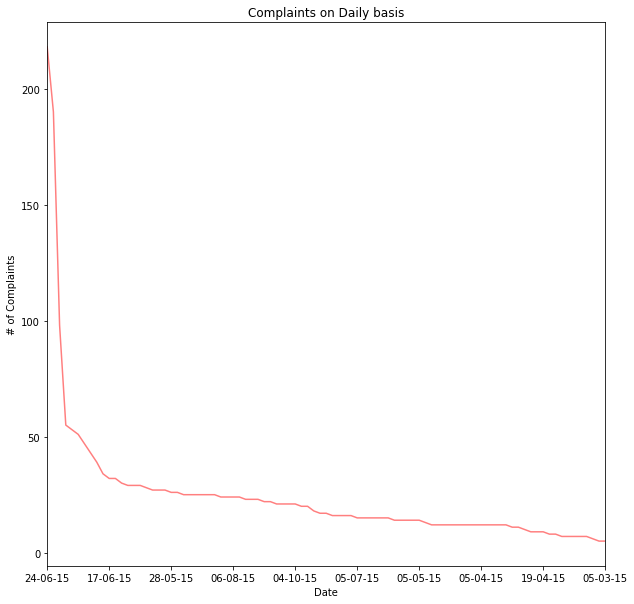

In [382]:
#Number of report on daily basis
plt.figure(figsize=(10,10))
data['Date'].value_counts().plot(kind='line',color='red',alpha=.5)
plt.xlabel("Date")
plt.ylabel("# of Complaints")
plt.title("Complaints on Daily basis")
plt.show()

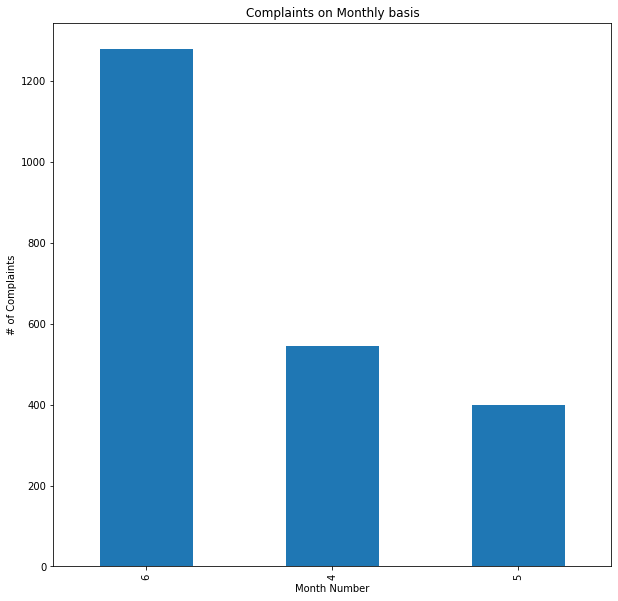

In [383]:
#Bar chart on month basis
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
plt.figure(figsize=(10,10))
data['Month'].value_counts().plot('bar')
plt.xlabel("Month Number")
plt.ylabel("# of Complaints")
plt.title("Complaints on Monthly basis")
plt.show()


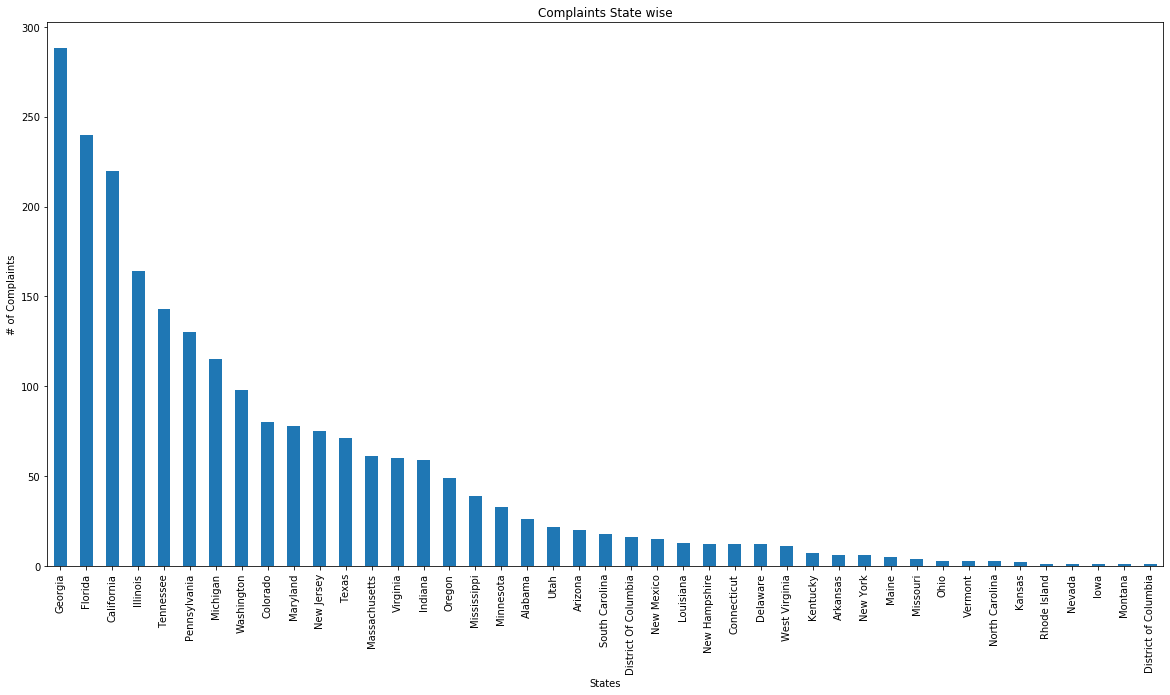

In [384]:
#State with Maximum Complaints
plt.figure(figsize=(20,10))
data['State'].value_counts().plot('bar')
plt.xlabel("States")
plt.ylabel("# of Complaints")
plt.title("Complaints State wise")
plt.show()

In [385]:
def statusnew(status):
    if status=='Open':
        return 'Open'
    elif status=='Pending':
        return 'Open'
    elif status=='Closed':
        return 'Closed'
    elif status=='Solved':
        return 'Closed'

In [386]:
data['Status']=data['Status'].apply(statusnew)

In [387]:
data['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

In [388]:
#converting to complaints to lower string
def lowercase(complaint):
    return complaint.lower()
data["Customer Complaint"]=data["Customer Complaint"].apply(lowercase)
data["Customer Complaint"].head()

0                        comcast cable internet speeds
1         payment disappear - service got disconnected
2                                    speed and service
3    comcast imposed a new usage cap of 300gb that ...
4           comcast not working and no service to boot
Name: Customer Complaint, dtype: object

In [389]:
def complainttype(complaint):
    if "speed" in complaint or "speeds" in complaint or "data" in complaint or "internet" in complaint or "disconnects" in complaint :
        return "Network Issue"
    elif "bill" in complaint or "billing" in complaint or "payments" in complaint or "payment" in complaint or "charge" in complaint or "charges" in complaint or "fee" in complaint or "fees" in complaint or "rates" in complaint:
        return "Billing Issue"
    elif "comcast" in complaint or "services" in complaint or "services" in complaint or "complaints" in complaint or "complaint" in complaint or "help" in complaint or "service" in complaint:
        return "Company Related"
    else:
        return "Other"

In [393]:
data["Customer Complaint"]=data["Customer Complaint"].apply(complainttype)

In [394]:
#frequency of complaint types
data["Customer Complaint"].value_counts()

Network Issue      821
Company Related    712
Billing Issue      461
Other              230
Name: Customer Complaint, dtype: int64

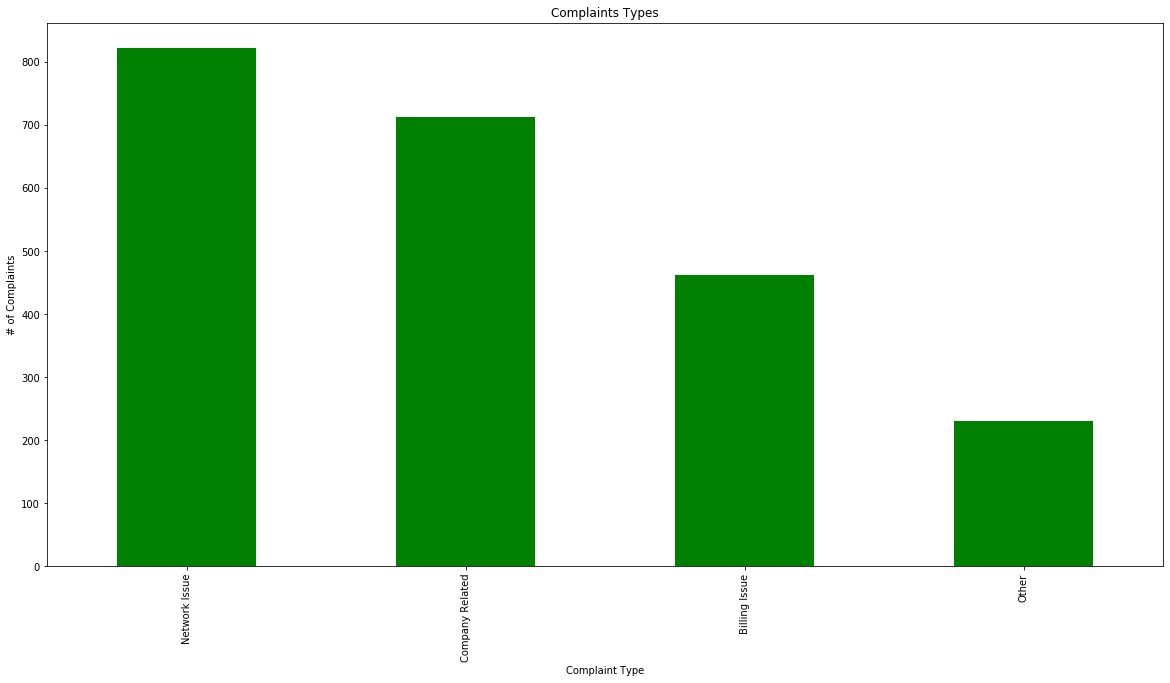

In [397]:
#No. of Complaints Types
plt.figure(figsize=(20,10))
data["Customer Complaint"].value_counts().plot('bar',color='green')
plt.xlabel("Complaint Type")
plt.ylabel("# of Complaints")
plt.title("Complaints Types")
plt.show()

In [398]:
#State with highest unresolved complaints
tempdata=data[(data["Status"]=='Open')]

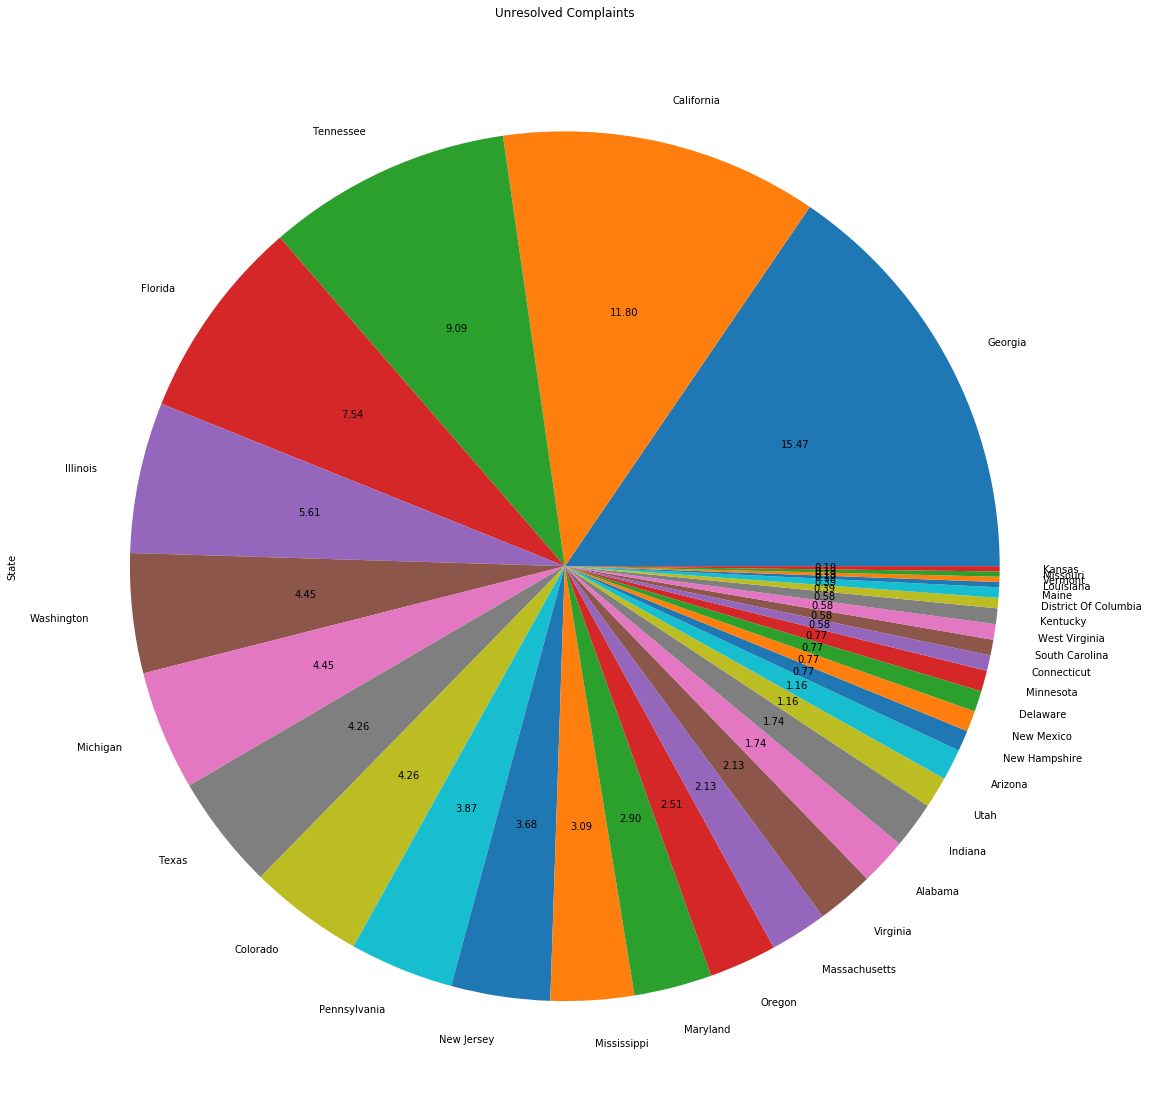

In [399]:
plt.figure(figsize=(20,20))
tempdata["State"].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Unresolved Complaints")
plt.show()

In [400]:
#percentage of complaints resolved- Internet and Customer Care
df=pd.DataFrame()
df=data[(data["Status"]=='Closed')]
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Network Issue,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Billing Issue,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,Network Issue,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
4,307175,Company Related,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,5
5,338519,Network Issue,2015-06-12,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Closed,No,6


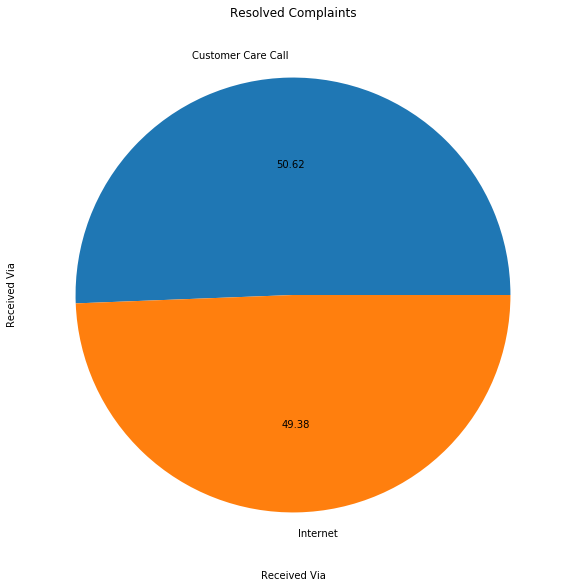

In [401]:
plt.figure(figsize=(20,10))
df["Received Via"].value_counts().plot(kind='pie',autopct='%.2f')
plt.xlabel("Received Via")
plt.title("Resolved Complaints")
plt.show()

In [402]:
new=pd.DataFrame()
new["State"]=data["State"]
new["Status"]=data["Status"]

In [403]:
new['Counter']=1
new=new.groupby(['State','Status']).count()
new

Counter
State                Status         
Alabama              Closed       17
                     Open          9
Arizona              Closed       14
                     Open          6
Arkansas             Closed        6
California           Closed      159
                     Open         61
Colorado             Closed       58
                     Open         22
Connecticut          Closed        9
                     Open          3
Delaware             Closed        8
                     Open          4
District Of Columbia Closed       14
                     Open          2
District of Columbia Closed        1
Florida              Closed      201
                     Open         39
Georgia              Closed      208
                     Open         80
Illinois             Closed      135
                     Open         29
Indiana              Closed       50
                     Open          9
Iowa                 Closed        1
Kansas               Closed        1
                     Open          1
Kentucky             Closed        4
                     Open          3
Louisiana            Closed       12
...                              ...
New Hampshire        Closed        8
                     Open          4
New Jersey           Closed       56
                     Open         19
New Mexico           Closed       11
                     Open          4
New York             Closed        6
North Carolina       Closed        3
Ohio                 Closed        3
Oregon               Closed       36
                     Open         13
Pennsylvania         Closed      110
                     Open         20
Rhode Island         Closed        1
South Carolina       Closed       15
                     Open          3
Tennessee            Closed       96
                     Open         47
Texas                Closed       49
                     Open         22
Utah                 Closed       16
                     Open          6
Vermont              Closed        2
                     Open          1
Virginia             Closed       49
                     Open         11
Washington           Closed       75
                     Open         23
West Virginia        Closed        8
                     Open          3

[77 rows x 1 columns]